All the tasks are to be completed using the keras Sequential interface . It’s recommended that
you run your code on GPU using google colab:
https://colab.research.google.com/
You can find a starter notebook here if you haven’t used colab before:
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quicks
tart/beginner.ipynb

## Task 1

Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the
traditional train/test split as given by fashion_mnist.load_data in keras. Use a separate 10000
samples (from the training set) for model selection and to compute learning curves (accuracy
vs epochs, not accuracy vs n_samples). Compare a “vanilla” model with a model using
drop-out and evaluate if using drop-out allows you to learn a bigger network. Then, compare to
a model using batch normalization. Visualize learning curves for all models.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import regularizers
from keras.datasets import fashion_mnist
import keras

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# the data, shuffled and split between train and test sets
(X_trainval, y_trainval), (X_test, y_test) =  fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, train_size = 5/6 , random_state=1)

print(X_trainval.shape ,y_trainval.shape, X_test.shape, y_test.shape )
print(X_train.shape ,y_train.shape, X_val.shape, y_val.shape )


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 28, 28) (50000,) (10000, 28, 28) (10000,)


In [0]:
#preparing data
batch_size = 128
epochs = 100
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], 784) # i.e. size of 50000 x 784
X_val = X_val.reshape(X_val.shape[0], 784) # i.e. size of 10000 X 784
X_train = X_train.astype('float32') # scaling between 0 and 1
X_val = X_val.astype('float32')
X_train /= 255 #i.e. divide by max
X_val /= 255
print(X_train.shape, "train sample's shape")
print(X_val.shape, "test sample's shape")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

(50000, 784) train sample's shape
(10000, 784) test sample's shape


In [0]:
# i.e. 'vanilla' model 
hidden_size = 128
model = Sequential()
model.add(Dense(hidden_size, input_shape=(784,), activation='relu')) # first hidden layer
model.add(Dense(hidden_size , activation='relu')) # second hidden layer
model.add(Dense(10, activation = 'softmax'))

# First comparing to see which of the Adam and RMSprop gives higher accuracy
# solver: adam
model.compile("adam", "categorical_crossentropy", metrics=['accuracy']);
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0)
score = model.evaluate(X_val,y_val, verbose = 0)
print("Optimizer : Adam")
print("Validation loss = {:.3f}".format(score[0]))
print("Validation accuracy =  {:.3f}".format(score[1]))

# solver: RMSprop
model.compile("rmsprop", "categorical_crossentropy", metrics=['accuracy']);
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0)
score = model.evaluate(X_val,y_val, verbose = 0)
print("Optimizer : RMSprop")
print("Validation loss = {:.3f}".format(score[0]))
print("Validation accuracy =  {:.3f}".format(score[1]))

Optimizer : Adam
Validation loss = 0.330
Validation accuracy =  0.882
Optimizer : RMSprop
Validation loss = 0.367
Validation accuracy =  0.883


Since there is no much difference between the two optimizers, we decided to go ahead with Adam


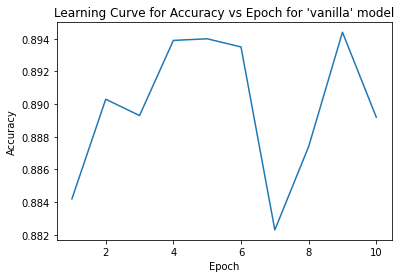

Best epoch number =  9  with accuracy of = 0.8944000005722046


In [0]:
# Learning Curve for Epochs
accuracy = []
epoch = np.arange(1,11)
for epoch_size in epoch:
  model.fit(X_train, y_train, batch_size = 128, epochs = epoch_size, verbose = 0)
  score = model.evaluate(X_val,y_val, verbose = 0)
  accuracy.append(score[1])

plt.plot(epoch, accuracy)
plt.title("Learning Curve for Accuracy vs Epoch for 'vanilla' model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show();

best_epoch_num = np.argmax(accuracy) + 1
print("Best epoch number = ", best_epoch_num,  " with accuracy of =", np.max(accuracy) )

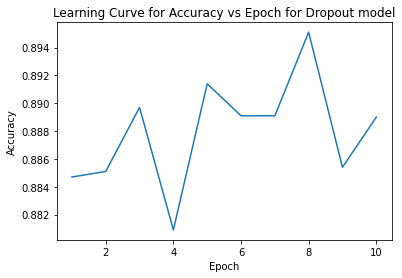

Best epoch number =  8  with accuracy of = 0.8950999975204468


In [0]:
# For Dropdout Model

model_dropout = Sequential([
    Dense(1024, input_shape = (784,), activation = 'relu'), # First hidden layer
    Dropout(0.5),
    Dense(1024, activation = 'relu'),  # Second hidden layer
    Dropout(0.5),
    Dense(10, activation = 'softmax'),
]
)

model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

# Learning Curve for Dropout
accuracy_dropout = []
for epoch_size in epoch:
  model.fit(X_train, y_train, batch_size = 128, epochs = epoch_size, verbose = 0)
  score = model.evaluate(X_val,y_val, verbose = 0)
  accuracy_dropout.append(score[1])

plt.plot(epoch, accuracy_dropout)
plt.title("Learning Curve for Accuracy vs Epoch for Dropout model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show();

best_epoch_num = np.argmax(accuracy_dropout) + 1
print("Best epoch number = ", best_epoch_num,  " with accuracy of =", np.max(accuracy_dropout) )

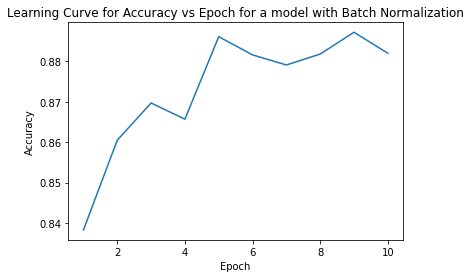

Best epoch number =  9  with accuracy of = 0.8871999979019165


In [0]:
# For a model with Batch Normalization
model_batch_norm = Sequential([
    Dense(256, input_shape = (784,), activation = 'relu'),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'softmax'),
]
)
model_batch_norm.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


# Learning Curve for the model with Batch Normalization
accuracy_normalization = []

for epoch_size in epoch:
  model_batch_norm.fit(X_train, y_train, batch_size = 128, epochs = epoch_size, verbose = 0)
  score = model_batch_norm.evaluate(X_val,y_val, verbose = 0)
  accuracy_normalization.append(score[1])

plt.plot(epoch, accuracy_normalization)
plt.title("Learning Curve for Accuracy vs Epoch for a model with Batch Normalization")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show();

best_epoch_num = np.argmax(accuracy_normalization) + 1
print("Best epoch number = ", best_epoch_num,  " with accuracy of =", np.max(accuracy_normalization) )